In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


Postar mais videos num único dia?
Qual genero?
Como que os caracteris implica na quantidade de views
qual pais consome mais quais são as caracteristicas de cada pais
desemprego
universitaria
população urbana

Quando que os canais uqe melhor sucederam foram estabelciso


In [4]:
df = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding = 'latin-1')

In [5]:
zero_views = df[df['video views'] == 0]
df = df.drop(zero_views.index)
df.reset_index(drop= True, inplace= True)
df[df['video views'] == 0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [6]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
4,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [7]:
canais_mais_inscritos = df.nlargest(10, 'subscribers') 
canais_mais_views = df.nlargest(10, 'video views') 

In [8]:
print(canais_mais_inscritos[['Youtuber', 'subscribers']])

                     Youtuber  subscribers
0                    T-Series    245000000
1                     MrBeast    166000000
2  Cocomelon - Nursery Rhymes    162000000
3                   SET India    159000000
4         ýýý Kids Diana Show    112000000
5                   PewDiePie    111000000
6                 Like Nastya    106000000
7               Vlad and Niki     98900000
8           Zee Music Company     96700000
9                         WWE     96000000


In [9]:
print(canais_mais_views[['Youtuber', 'video views']])

                      Youtuber   video views
0                     T-Series  2.280000e+11
2   Cocomelon - Nursery Rhymes  1.640000e+11
3                    SET India  1.480000e+11
12                    Sony SAB  1.010000e+11
4          ýýý Kids Diana Show  9.324704e+10
6                  Like Nastya  9.047906e+10
9                          WWE  7.742847e+10
7                Vlad and Niki  7.718017e+10
17                      Zee TV  7.313905e+10
22                   Colors TV  6.151091e+10


**Esses são os 10 canais no youtube com mais inscritos** agora podemos análisar: Os canais com mais inscritos são necessáriamentes os canais com mais visualização?

In [10]:
#calcula de uma correlação
correlation = df['subscribers'].corr(df['video views'])

Correlação entre inscritos e visualizações: 0.8242619797868961


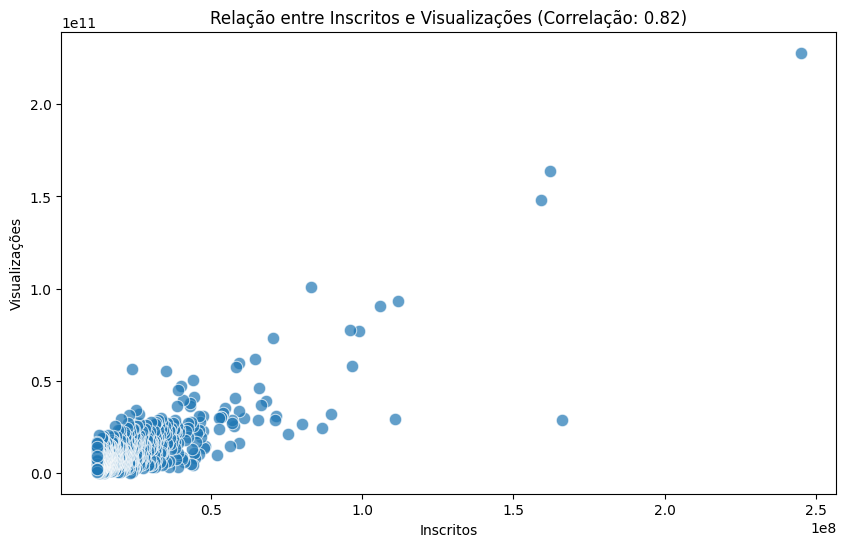

In [11]:
#Análise gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=df, s=80, alpha=0.7)
plt.title('Relação entre Inscritos e Visualizações (Correlação: {:.2f})'.format(correlation))
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')

# Exibindo o valor da correlação
print('Correlação entre inscritos e visualizações:', correlation)

**Uma forte correlação positiva entre essas variáveis. Isso significa que, em geral, à medida que o número de inscritos aumenta, também aumentam as visualizações dos vídeos do canal no YouTube**

In [12]:
views_por_pais = df.groupby('Country')['video views'].sum()

# Encontrar os 10 países com mais visualizações
top_10_paises = views_por_pais.nlargest(10)

print("Top 10 países com mais visualizações:")
print(top_10_paises)

Top 10 países com mais visualizações:
Country
United States     3.690292e+12
India             2.281048e+12
Brazil            4.812090e+11
United Kingdom    4.305665e+11
Thailand          2.643180e+11
Russia            2.329963e+11
South Korea       2.255917e+11
Mexico            1.982199e+11
Argentina         1.944154e+11
Canada            1.913206e+11
Name: video views, dtype: float64


In [13]:
# Lista dos países do top 10
lista_top_10_paises = top_10_paises.index.tolist()

caracteristicas_top_10 = df[df['Country'].isin(lista_top_10_paises)][['Country', 'Population', 'Unemployment rate', 'Urban_population']]
caracteristicas_top_10 = caracteristicas_top_10.drop_duplicates(subset=['Country'])  # Remover linhas duplicadas

print(caracteristicas_top_10)

           Country    Population  Unemployment rate  Urban_population
0            India  1.366418e+09               5.36       471031528.0
1    United States  3.282395e+08              14.70       270663028.0
6           Russia  1.443735e+08               4.59       107683889.0
10     South Korea  5.170910e+07               4.15        42106719.0
13  United Kingdom  6.683440e+07               3.85        55908316.0
15          Canada  3.699198e+07               5.56        30628482.0
19          Brazil  2.125594e+08              12.08       183241641.0
27       Argentina  4.493871e+07               9.79        41339571.0
57        Thailand  6.962558e+07               0.75        35294600.0
67          Mexico  1.260140e+08               3.42       102626859.0


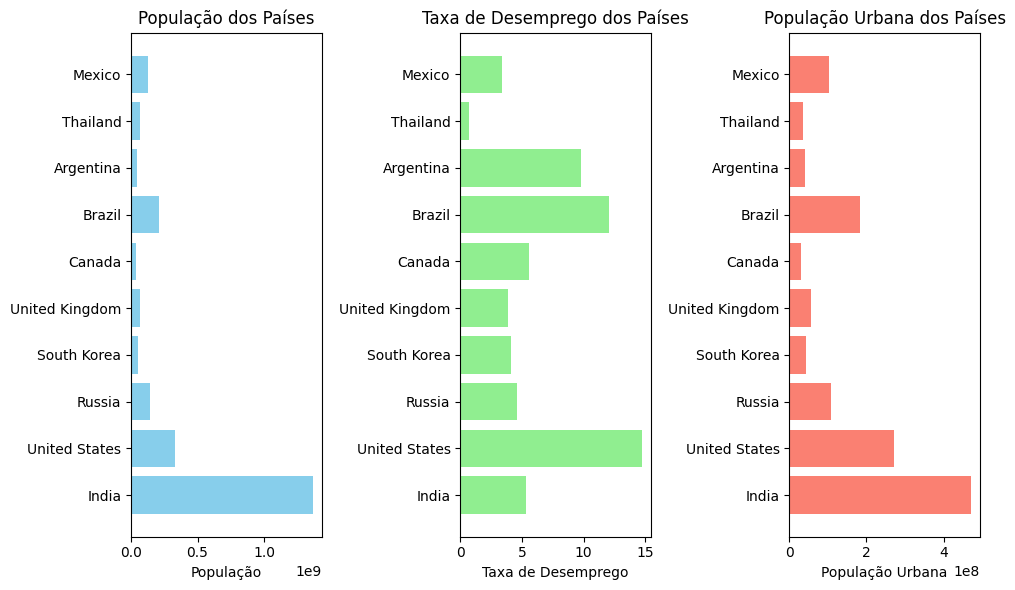

In [14]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para População
plt.subplot(1, 3, 1)
plt.barh(caracteristicas_top_10['Country'], caracteristicas_top_10['Population'], color='skyblue')
plt.title('População dos Países')
plt.xlabel('População')

# Gráfico de barras para Taxa de Desemprego
plt.subplot(1, 3, 2)
plt.barh(caracteristicas_top_10['Country'], caracteristicas_top_10['Unemployment rate'], color='lightgreen')
plt.title('Taxa de Desemprego dos Países')
plt.xlabel('Taxa de Desemprego')

# Gráfico de barras para População Urbana
plt.subplot(1, 3, 3)
plt.barh(caracteristicas_top_10['Country'], caracteristicas_top_10['Urban_population'], color='salmon')
plt.title('População Urbana dos Países')
plt.xlabel('População Urbana')

plt.tight_layout()
plt.show()

Vejamos as caracteristicas dos canáis que mais possuem mais views

In [15]:
Categorias = df.groupby('category')['video views'].sum()

# Encontrar os 10 países com mais visualizações
top_10_categorias = Categorias.nlargest(10)

print("Top 10 categorias com mais visualizações:")
print(Categorias)

Top 10 categorias com mais visualizações:
category
Autos & Vehicles         1.500346e+10
Comedy                   5.501128e+11
Education                6.966145e+11
Entertainment            2.527739e+12
Film & Animation         5.444225e+11
Gaming                   7.176389e+11
Howto & Style            2.018175e+11
Movies                   1.538326e+10
Music                    3.121478e+12
News & Politics          2.703919e+11
Nonprofits & Activism    1.086291e+10
People & Blogs           1.265791e+12
Pets & Animals           4.486675e+10
Science & Technology     6.697675e+10
Shows                    4.462068e+11
Sports                   1.479863e+11
Trailers                 3.326272e+10
Travel & Events          3.140883e+09
Name: video views, dtype: float64


In [16]:
Tipo_canal = df.groupby('channel_type')['video views'].sum()

# Encontrar os 10 países com mais visualizações
top_10_canais = Tipo_canal.nlargest(10)

print("Top 10 tipos de canais com mais visualizações:")
print(Tipo_canal)

Top 10 tipos de canais com mais visualizações:
channel_type
Animals          4.413526e+10
Autos            1.957755e+10
Comedy           4.531406e+11
Education        7.648059e+11
Entertainment    3.371893e+12
Film             4.592427e+11
Games            7.266072e+11
Howto            1.956506e+11
Music            3.252736e+12
News             3.113528e+11
Nonprofit        1.086291e+10
People           8.859191e+11
Sports           1.811050e+11
Tech             5.935554e+10
Name: video views, dtype: float64


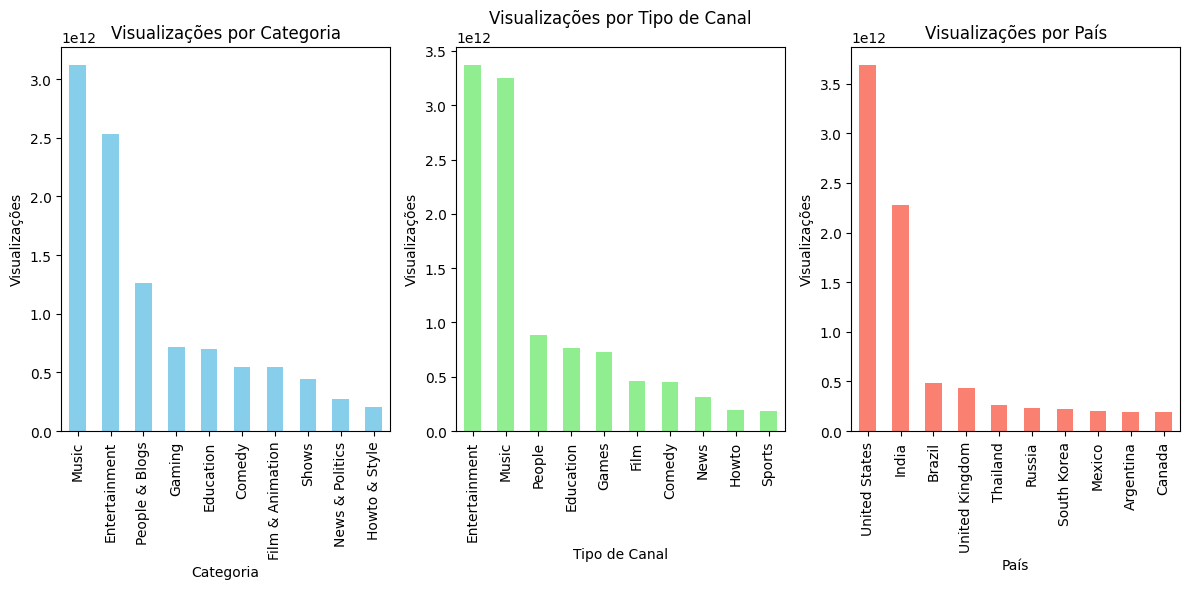

In [17]:

# Calcular as visualizações por categoria, tipo de canal e país
categorias_views = df.groupby('category')['video views'].sum()
channel_type_views = df.groupby('channel_type')['video views'].sum()
country_views = df.groupby('Country')['video views'].sum()

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para categorias
plt.subplot(1, 3, 1)
categorias_views.nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Visualizações por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Visualizações')

# Gráfico de barras para tipo de canal
plt.subplot(1, 3, 2)
channel_type_views.nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Visualizações por Tipo de Canal')
plt.xlabel('Tipo de Canal')
plt.ylabel('Visualizações')

# Gráfico de barras para países
plt.subplot(1, 3, 3)
country_views.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Visualizações por País')
plt.xlabel('País')
plt.ylabel('Visualizações')

plt.tight_layout()
plt.show()

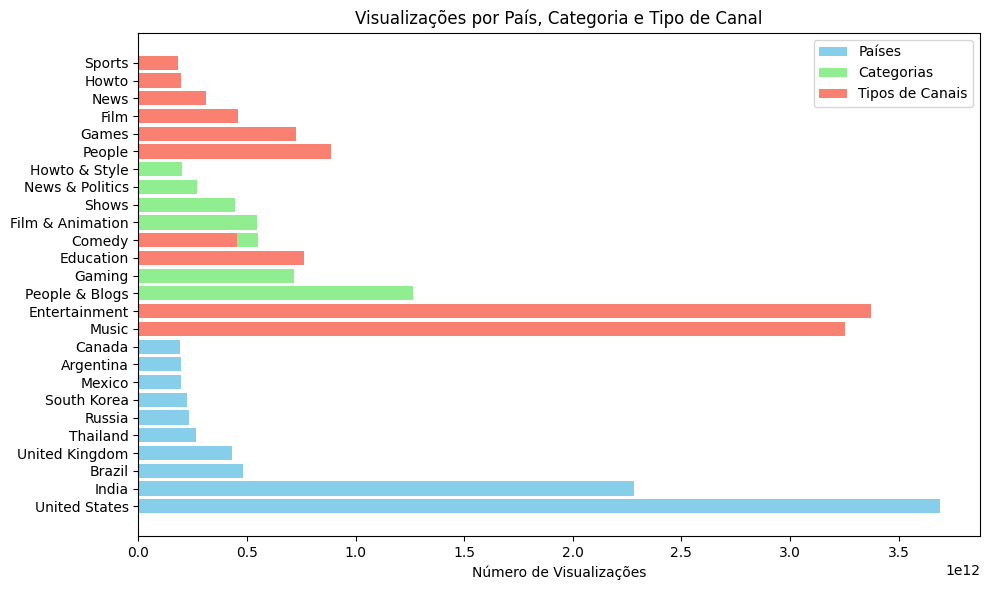

In [18]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras empilhadas para visualizações por país, categoria e tipo de canal
plt.barh(top_10_paises.index, top_10_paises.values, color='skyblue', label='Países')
plt.barh(top_10_categorias.index, top_10_categorias.values, color='lightgreen', label='Categorias')
plt.barh(top_10_canais.index, top_10_canais.values, color='salmon', label='Tipos de Canais')

plt.xlabel('Número de Visualizações')
plt.title('Visualizações por País, Categoria e Tipo de Canal')
plt.legend()
plt.tight_layout()

plt.show()

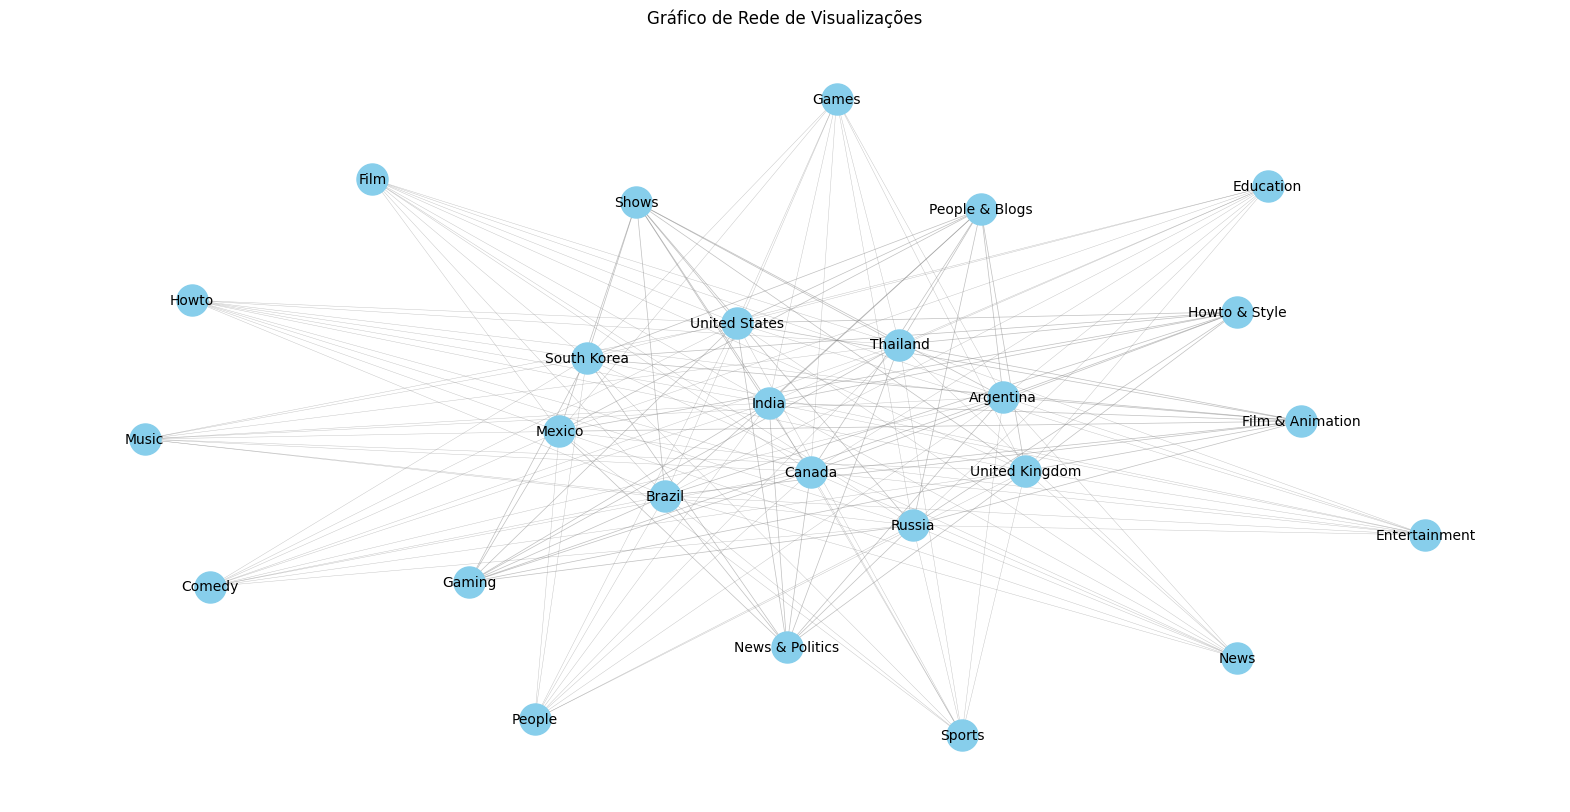

In [19]:
# Criar um grafico
G = nx.Graph()

# Adicionar nós 
G.add_nodes_from(top_10_paises.index, type='País')
G.add_nodes_from(top_10_categorias.index, type='Categoria')
G.add_nodes_from(top_10_canais.index, type='Tipo de Canal')

# Adicionar arestas entre países, categorias e tipos de canais
for pais in top_10_paises.index:
    for categoria in top_10_categorias.index:
        G.add_edge(pais, categoria, weight=0.5)  # Peso 0.5 para representar a relação entre país e categoria
    for canal in top_10_canais.index:
        G.add_edge(pais, canal, weight=0.3)  # Peso 0.3 para representar a relação entre país e tipo de canal

# Layout do gráfico de rede
pos = nx.spring_layout(G)

# Tamanho do gráfico
plt.figure(figsize=(20, 10))  # Altere o tamanho aqui

# Desenhar os nós
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)

# Desenhar as arestas
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')

# Adicionar rótulos aos nós
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

plt.title('Gráfico de Rede de Visualizações')
plt.axis('off')
plt.show()